In [1]:
# including the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [4]:
def getDataframe(path):
    # importing the dataset
    df = pd.read_excel(path)
    # 50001 records each have 20 columns
    print("Shape of the dataset: " + str(df.shape))
    # types of values stored in each column
    print("Datatypes Of Columns: " + str(df.dtypes))
    # return the dataframe
    return df

In [5]:
df = getDataframe("chatgpt1.xlsx")

Shape of the dataset: (50001, 20)
Datatypes Of Columns: Datetime          object
Tweet Id           int64
Text              object
Username          object
Permalink         object
User              object
Outlinks          object
CountLinks        object
ReplyCount         int64
RetweetCount       int64
LikeCount          int64
QuoteCount         int64
ConversationId     int64
Language          object
Source            object
Media             object
QuotedTweet       object
MentionedUsers    object
hashtag           object
hastag_counts      int64
dtype: object


In [6]:
df.head(5)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871689984,ChatGPTã§éŠã¶ã®å¿˜ã‚Œã¦ãŸï¼ï¼\næ›¸é¡žä...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871689984,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046129920,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993799936,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926340096,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926340096,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297250048,Bow down to chatGPT ðŸ«¡..... https://t.co/ENT...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297250048,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570112,"Profilinde vatan, TÃ¼rkiye falan yazan bireyle...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570112,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


In [7]:
df.tail(5)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
49996,2023-01-24 06:57:56+00:00,1617778712082089984,"#ChatGPT ist ein #Chatbot, der durch kÃ¼nstlic...",HorstKrieger,https://twitter.com/HorstKrieger/status/161777...,https://twitter.com/HorstKrieger,"['https://lnkd.in/dzHbz5-z', 'https://lnkd.in/...","['https://t.co/qxUJZinuNO', 'https://t.co/lFZD...",0,0,0,0,1617778712082089984,de,"<a href=""http://www.linkedin.com/"" rel=""nofoll...",NaN,NaN,NaN,"['#ChatGPT', '#Chatbot,', '#KI', '#AI', '#Dial...",6
49997,2023-01-24 06:57:59+00:00,1617778726393240064,@r8r Ich hab mal die AI dazu befragt (ChatGPT)...,werpu,https://twitter.com/werpu/status/1617778726393...,https://twitter.com/werpu,NaN,NaN,0,0,0,0,1617774521586700032,de,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,"[User(username='r8r', id=15451529, displayname...",[],0
49998,2023-01-24 06:58:00+00:00,1617778728481989888,5 minuti di #chatGPT e ho capito che apprende ...,marcopiccinini,https://twitter.com/marcopiccinini/status/1617...,https://twitter.com/marcopiccinini,NaN,NaN,0,0,0,0,1617778728481989888,it,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,['#chatGPT'],1
49999,2023-01-24 06:58:01+00:00,1617778731678040064,Portland Shop Uses ChatGPT To Tell Family Stor...,EuniceNyandat,https://twitter.com/EuniceNyandat/status/16177...,https://twitter.com/EuniceNyandat,['https://drumup.io/s/DkswB6'],['https://t.co/rzGvr6yTOc'],0,0,0,0,1617778731678040064,en,"<a href=""https://drumup.io"" rel=""nofollow"">dru...",NaN,NaN,NaN,[],0
50000,2023-01-24 06:58:01+00:00,1617778733355790080,Ahora sueÃ±o con el dÃ­a en que Amazon integre...,AmericoSD_69,https://twitter.com/AmericoSD_69/status/161777...,https://twitter.com/AmericoSD_69,NaN,NaN,0,0,0,0,1617778733355790080,es,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,[],0


In [8]:
df.shape

(50001, 20)

In [9]:
# Sneak peak to overall dataset
def summary(df):
    summary = pd.DataFrame(df.dtypes, columns = ['dtypes'])
    summary = summary.reset_index()
    summary['missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    return summary

summary(df)

,index,dtypes,missing,Uniques
0,Datetime,object,0,41559
1,Tweet Id,int64,0,50000
2,Text,object,5,49551
3,Username,object,0,38433
4,Permalink,object,0,50001
5,User,object,0,38433
6,Outlinks,object,30059,13769
7,CountLinks,object,30059,19485
8,ReplyCount,int64,0,108
9,RetweetCount,int64,0,138


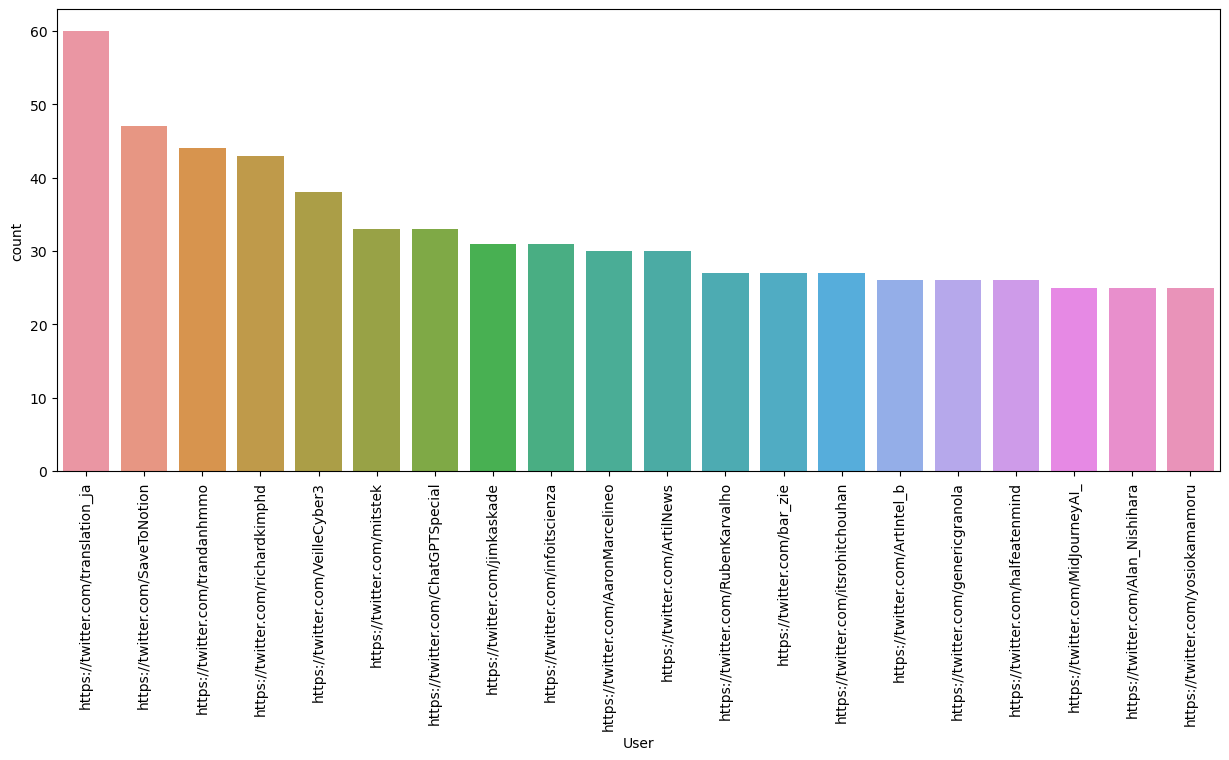

In [10]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='User', order=df["User"].value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

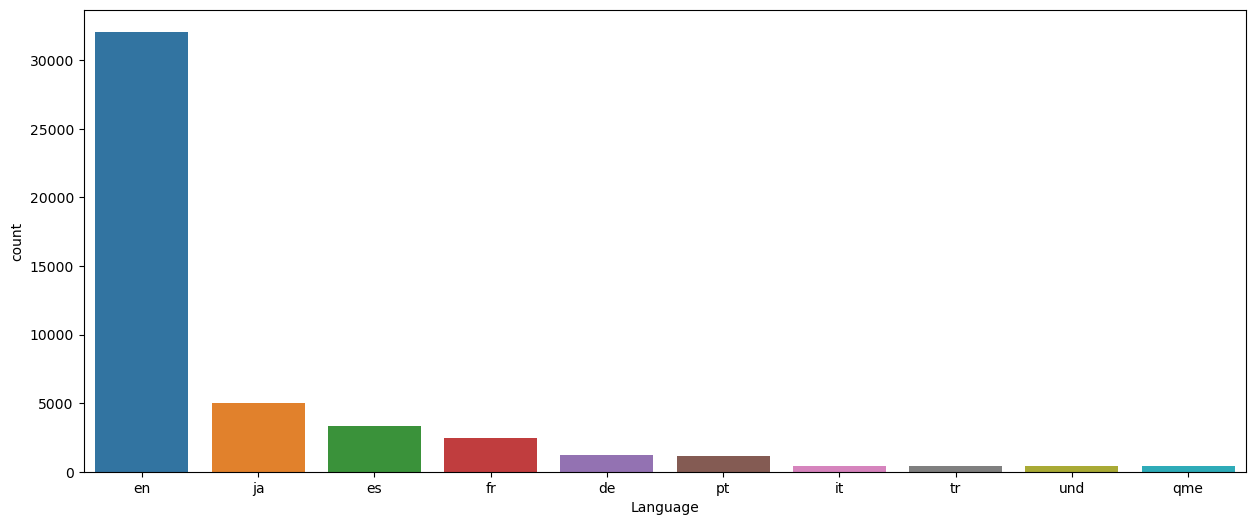

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Language', order=df["Language"].value_counts().index[:10])
plt.show()

In [12]:
# Handle missing data 
df = df.dropna()  # Remove rows with missing values
df.head(2)
df.drop(['Datetime'], axis=1)

,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
2,1617156308926340096,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926340096,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
392,1617162263273600000,@OpenAI ChatGPT does! https://t.co/MlMO00Vg8A ...,Why_So_Trill,https://twitter.com/Why_So_Trill/status/161716...,https://twitter.com/Why_So_Trill,['https://twitter.com/vcrussell/status/1617154...,['https://t.co/MlMO00Vg8A'],0,0,2,0,1617162263273600000,en,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/VCRussell/status/161715463...,"[User(username='OpenAI', id=4398626122, displa...",[],0
1120,1617171380306319872,"Mieux que la chatgpt, le chat CGT dit les Term...",gregors_mac,https://twitter.com/gregors_mac/status/1617171...,https://twitter.com/gregors_mac,['https://twitter.com/vinceflibustier/status/1...,['https://t.co/yspDUyMhZj'],1,0,2,0,1617171380306319872,fr,"<a href=""http://twitter.com/download/android"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/vinceflibustier/status/161...,"[User(username='ManaProd', id=7097744297866772...",[],0
1209,1617172498822439936,RT:(@ForbesTech): Generative AI ChatGPT Is Goi...,yova,https://twitter.com/yova/status/16171724988224...,https://twitter.com/yova,['https://www.forbes.com/sites/lanceeliot/2023...,"['https://t.co/iQt3grQJTd', 'https://t.co/xHu8...",0,0,0,0,1617172498822439936,en,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/ForbesTech/status/16171696...,"[User(username='ForbesTech', id=14885549, disp...","['#weatherguy', '#forbesTech', '#technology', ...",4
1424,1617175299195830016,BREAKTHROUGH!\n$GM implications\n\nChatGPT clo...,ConnectingODots,https://twitter.com/ConnectingODots/status/161...,https://twitter.com/ConnectingODots,['https://twitter.com/GRDecter/status/16171631...,['https://t.co/BECBeuc4qv'],4,4,41,0,1617175299195830016,en,"<a href=""http://twitter.com/download/android"" ...",[Gif(thumbnailUrl='https://pbs.twimg.com/tweet...,https://twitter.com/GRDecter/status/1617163150...,"[User(username='mtbarra', id=1219824320, displ...",['#MaryLed'],1
4802,1617222526689590016,ðŸ¤ª Est-ce que ChatGPT m'a donnÃ© des idÃ©es ...,yOyO38,https://twitter.com/yOyO38/status/161722252668...,https://twitter.com/yOyO38,['https://twitter.com/yOyO38/status/1617161458...,['https://t.co/hKpwuFKq3x'],2,3,19,0,1617222526689590016,fr,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,https://twitter.com/yOyO38/status/161716145896...,"[User(username='Yousignfr', id=1481783244, dis...",[],0
4852,1617223302262419968,More on @Google's @DeepMind #ChatGPT competito...,DataChaz,https://twitter.com/DataChaz/status/1617223302...,https://twitter.com/DataChaz,['https://time.com/6246119/demis-hassabis-deep...,"['https://t.co/PZisLylfIU', 'https://t.co/CQng...",1,12,57,2,1617223302262419968,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DataChaz/status/1617085963...,"[User(username='Google', id=20536157, displayn...","['#ChatGPT', '#Sparrow,']",2
5304,1617230791494220032,ChatGPT se perfeccionÃ³ sobre GPT-3.5 mediante...,muuficom,https://twitter.com/muuficom/status/1617230791...,https://twitter.com/muuficom,['https://twitter.com/muuficom/status/16172242...,['https://t.co/q6gxN09cZf'],0,0,

In [9]:
# Feature engineering
df['TextLength'] = df['Text'].apply(lambda x: len(x))
df['HasMedia'] = df['Media'].apply(lambda x: int(x != ''))
df['NumMentions'] = df['MentionedUsers'].str.split().apply(lambda x: len(x))
df['NumHashtags'] = df['hashtag'].str.split().apply(lambda x: len(x))
df = pd.get_dummies(df, columns=['Language', 'Source'])

# Split the dataset into features and target variable
X = df.drop(columns=['Username'])
X = df.drop(columns=['Datetime'])
y = df['Username']

In [10]:
X

,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,...,Language_fr,Language_it,Language_zh,"Source_<a href=""http://twitter.com/#!/download/ipad"" rel=""nofollow"">Twitter for iPad</a>","Source_<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>","Source_<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Source_<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>","Source_<a href=""https://ifttt.com"" rel=""nofollow"">IFTTT</a>","Source_<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>","Source_<a href=""https://twitter.com"" rel=""nofollow"">TweetDeck Web App</a>"
2,1617156308926340096,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,...,0,0,0,1,0,0,0,0,0,0
392,1617162263273600000,@OpenAI ChatGPT does! https://t.co/MlMO00Vg8A ...,Why_So_Trill,https://twitter.com/Why_So_Trill/status/161716...,https://twitter.com/Why_So_Trill,['https://twitter.com/vcrussell/status/1617154...,['https://t.co/MlMO00Vg8A'],0,0,2,...,0,0,0,0,0,1,0,0,0,0
1120,1617171380306319872,"Mieux que la chatgpt, le chat CGT dit les Term...",gregors_mac,https://twitter.com/gregors_mac/status/1617171...,https://twitter.com/gregors_mac,['https://twitter.com/vinceflibustier/status/1...,['https://t.co/yspDUyMhZj'],1,0,2,...,1,0,0,0,1,0,0,0,0,0
1209,1617172498822439936,RT:(@ForbesTech): Generative AI ChatGPT Is Goi...,yova,https://twitter.com/yova/status/16171724988224...,https://twitter.com/yova,['https://www.forbes.com/sites/lanceeliot/2023...,"['https://t.co/iQt3grQJTd', 'https://t.co/xHu8...",0,0,0,...,0,0,0,0,0,0,0,1,0,0
1424,1617175299195830016,BREAKTHROUGH!\n$GM implications\n\nChatGPT clo...,ConnectingODots,https://twitter.com/ConnectingODots/status/161...,https://twitter.com/ConnectingODots,['https://twitter.com/GRDecter/status/16171631...,['https://t.co/BECBeuc4qv'],4,4,41,...,0,0,0,0,1,0,0,0,0,0
4802,1617222526689590016,ðŸ¤ª Est-ce que ChatGPT m'a donnÃ© des idÃ©es ...,yOyO38,https://twitter.com/yOyO38/status/161722252668...,https://twitter.com/yOyO38,['https://twitter.com/yOyO38/status/1617161458...,['https://t.co/hKpwuFKq3x'],2,3,19,...,1,0,0,0,0,0,0,0,1,0
4852,1617223302262419968,More on @Google's @DeepMind #ChatGPT competito...,DataChaz,https://twitter.com/DataChaz/status/1617223302...,https://twitter.com/DataChaz,['https://time.com/6246119/demis-hassabis-deep...,"['https://t.co/PZisLylfIU', 'https://t.co/CQng...",1,12,57,...,0,0,0,0,0,0,0,0,1,0
5304,1617230791494220032,ChatGPT se perfeccionÃ³ sobre GPT-3.5 mediante...,muuficom,https://twitter.com/muuficom/status/1617230791...,https://twitter.com/muuficom,['https://twitter.com/muuficom/status/16172242...,['https://t.co/q6gxN09cZf'],0,0,0,...,0,0,0,0,0,0,0,0,1,0
5369,1617231936874840064,"The ""...dark forest is about to expand. Large ...",mjcavaretta,https://twitter.com/mjcavaretta/status/1617231...,https://twitter.com/mjcavaretta,['https://twitter.com/PlayNiceInst/status/1616...,['https://t.co/83gvzkzONU'],0,0,1,...,0,0,0,0,0,0,0,0,0,1
8066,1617276055328349952,"@farzyness @enn_nafnlaus Lol sorry, it's just ...",Sammy_Swagner,https://twitter.com/Sammy_Swagner/status/16172...,https://twitter.com/Sammy_Swagner,['https://twitter.com/enn_nafnlaus/status/1617...,['https://t.co/0BsAemDGkc'],0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Task 1
<hr>

In [11]:
import numpy as np

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# importing the dataset
df = pd.read_excel("chatgpt1.xlsx")

In [14]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        try:
            itm = data[col].value_counts().index[0]
            val = data[col].value_counts().values[0]
            items.append(itm)
            vals.append(val)
        except Exception as ex:
            print(ex)
            items.append(0)
            vals.append(0)
            continue
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [15]:
most_frequent_values(df)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
Total,50001,50001,49996,50001,50001,50001,19942,19942,50001,50001,50001,50001,50001,50001,50001,9502,3563,17169,50001,50001
Most frequent item,2023-01-23 17:11:13+00:00,1617521075868549888,@chatgpt_issac AI,translation_ja,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/translation_ja,['https://www.ft.com/content/7229ba86-142a-49f...,['https://t.co/xegxY3jDom'],0,0,0,0,1617162355112120064,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/GRDecter/status/1617162355...,"[User(username='GRDecter', id=1281457267582177...",[],0
Frequence,8,2,164,60,1,60,149,19,36736,42416,27141,47665,264,32076,17814,20,209,332,36414,36414
Percent from total,0.016,0.004,0.328,0.12,0.002,0.12,0.747,0.095,73.471,84.83,54.281,95.328,0.528,64.151,35.627,0.21,5.866,1.934,72.827,72.827


In [16]:
df['Username'].unique()

array(['mochico0123', 'Caput_LupinumSG', 'ciffi', ..., 'marcopiccinini',
       'EuniceNyandat', 'AmericoSD_69'], dtype=object)

In [17]:
df['Username'].value_counts()

translation_ja    60
SaveToNotion      47
trandanhmmo       44
richardkimphd     43
VeilleCyber3      38
                  ..
masayume_32        1
WRoughSketch       1
ayazfarooqui       1
Technology_GD      1
AmericoSD_69       1
Name: Username, Length: 38433, dtype: int64

In [18]:
df['User'].unique()

array(['https://twitter.com/mochico0123',
       'https://twitter.com/Caput_LupinumSG', 'https://twitter.com/ciffi',
       ..., 'https://twitter.com/marcopiccinini',
       'https://twitter.com/EuniceNyandat',
       'https://twitter.com/AmericoSD_69'], dtype=object)

In [19]:
df['User'].value_counts()

https://twitter.com/translation_ja    60
https://twitter.com/SaveToNotion      47
https://twitter.com/trandanhmmo       44
https://twitter.com/richardkimphd     43
https://twitter.com/VeilleCyber3      38
                                      ..
https://twitter.com/masayume_32        1
https://twitter.com/WRoughSketch       1
https://twitter.com/ayazfarooqui       1
https://twitter.com/Technology_GD      1
https://twitter.com/AmericoSD_69       1
Name: User, Length: 38433, dtype: int64

In [45]:
df['ReplyCount'].unique()

array([   1,    0,   23,    4,   37,    2,    3,  209,  149,  126,   17,
         22,    5,   54,   34,   21,   13, 3098,   69, 1421,   10,    8,
          6,    9,    7,   43,   15,   11,   12,  111,   29,  164,  286,
         28,   20,  496,   14,   31,   40,   47,  374,   33,  338,   26,
        100,   39,   18,   59,  154,   16,   55,  114,  476,   44,   24,
        119,   99,   42,   36,   27,   68,   92,  159,   19,   88,   35,
        446,   52,   45,  147,  106,  166,   32,   89,  165,   50,  130,
         51,   95, 1455, 3044,   96,  490,  194,   48,   74,  248,   72,
         80,   57,   25,   93,   38, 1110,  161,  183,   41,  135,   79,
        103,   71,   49,   30,   63,  176,   67,  777,  331])

In [46]:
df['ReplyCount'].value_counts()

0      36736
1       9430
2       1801
3        653
4        333
       ...  
44         1
331        1
490        1
106        1
159        1
Name: ReplyCount, Length: 108, dtype: int64

In [47]:
df['RetweetCount'].unique()

array([   0,    1,    5,    6,  542,   40,   49,   18,    3,    2,   16,
          4,  112,   39,   36, 1094,   12, 6815,   10,   20,    7,   58,
         23,   11,   15,   45,   37,    8,   31,   19,  160,   27,    9,
         38,   34,   14,  125,   17,   74,  461,   68,   26,   13, 2627,
         47,   53,   88,   21,   25,  221,  334,   50,   30,   22,  252,
         33,  713,  597,   76,   43,   28,  227, 1732,   66,   98,  136,
         92,  114,  730,   64,   24,  202, 1874,   67,   29,  186,  118,
         97,   52,  108, 2463,   59,   32,   93,   35,   56,  564, 3987,
        170,   55,  257, 1307,   95,   62,   44,   57,   89,   54,   83,
        222,  337,  236,  376,  121, 1533,  458,   78,   61,   51, 2203,
         70,  428,   42,  140,   46, 1534,  164,  162,  213,  139,  289,
       1113,   48,  418,  206,  107,  148,   99,  516,   41,  452,  630,
        176,   79,   69,  679, 2082,  248])

In [49]:
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [50]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Comment", "text", "attr", "object"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show() 

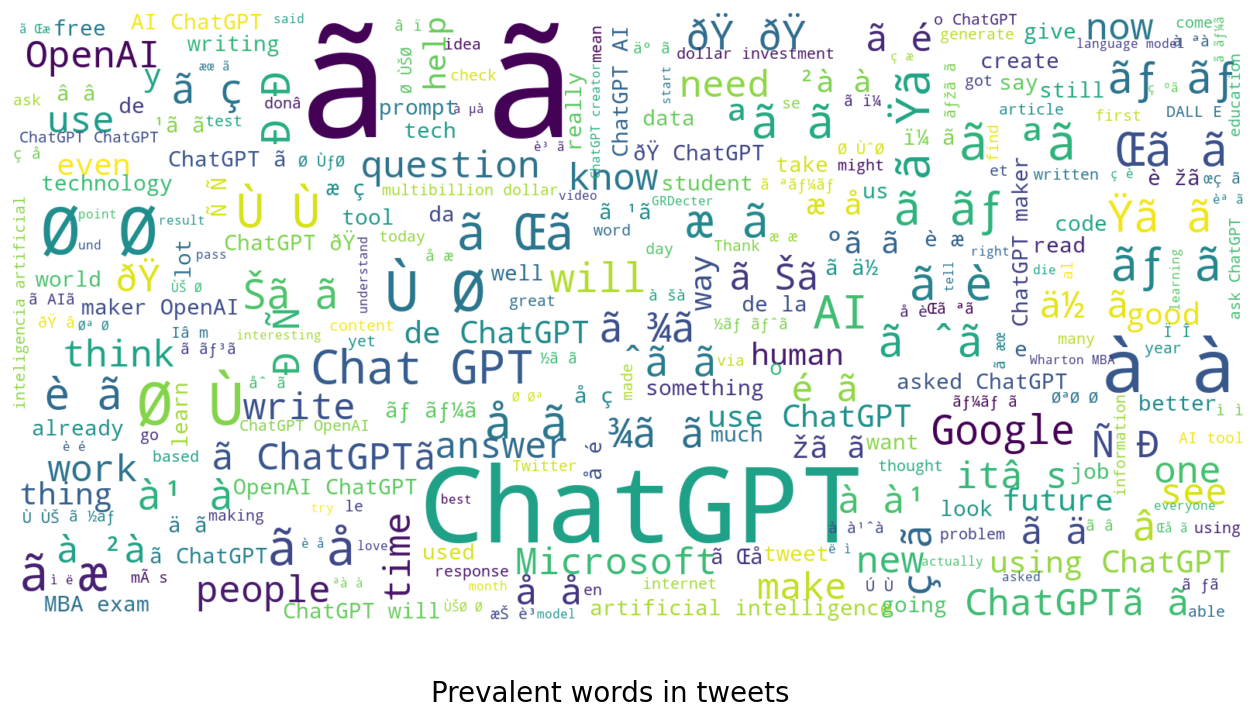

In [51]:
show_wordcloud(df['Text'], title = 'Prevalent words in tweets')

In [52]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [53]:
df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day
df['dayofweek'] = df['Datetime'].dt.dayofweek
df['hour'] = df['Datetime'].dt.hour
df['minute'] = df['Datetime'].dt.minute
df['dayofyear'] = df['Datetime'].dt.dayofyear
df['date_only'] = df['Datetime'].dt.date

In [54]:
tweets_agg_df = df.groupby(["date_only"])["Text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [56]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    sns.set(style="whitegrid")                                                 
    paper_rc = {'lines.linewidth': 3, 'lines.markersize': 20}                  
    sns.set_context("paper", rc = paper_rc)  
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()

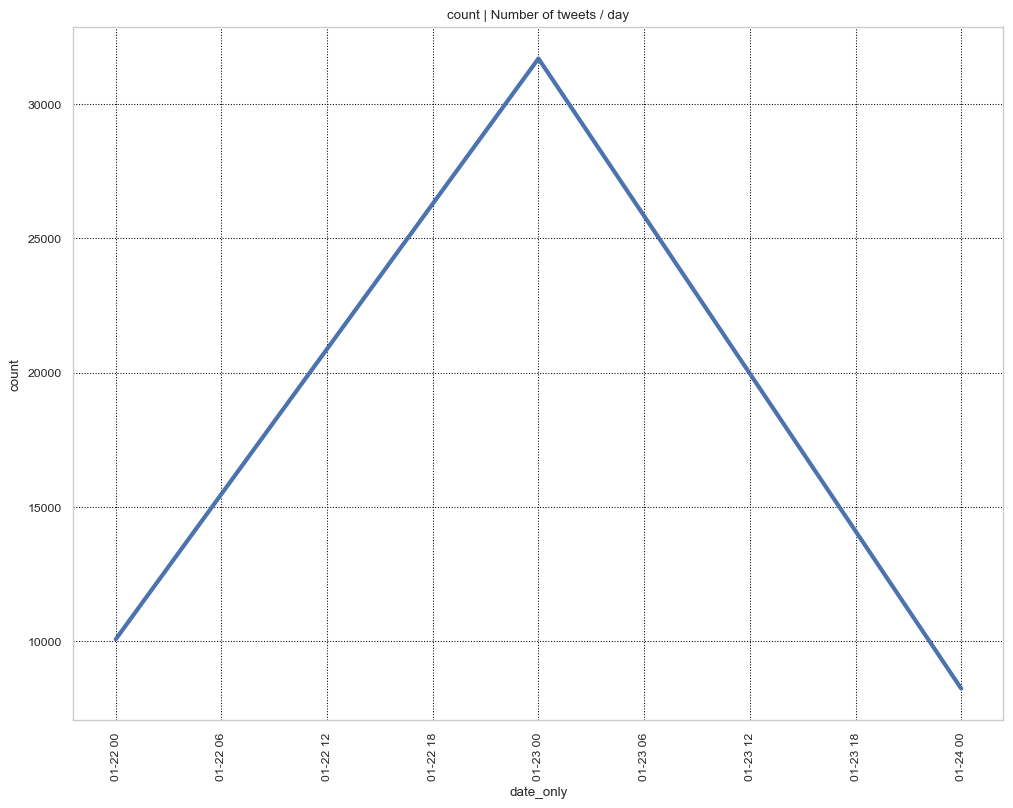

In [57]:
plot_time_variation(tweets_agg_df, x='date_only', title="Number of tweets / day",size=3)

In [58]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    try:
        if sia.polarity_scores(post)["compound"] > 0:
            return "Positive"
        elif sia.polarity_scores(post)["compound"] < 0:
            return "Negative"
        else:
            return "Neutral"  
    except:
        return "Neutral"

In [59]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
    
    colors = ["green", "red", "blue"]
    counts.plot(kind='bar', ax=ax1, color=colors)
    percent.plot(kind='bar', ax=ax2, color=colors)
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

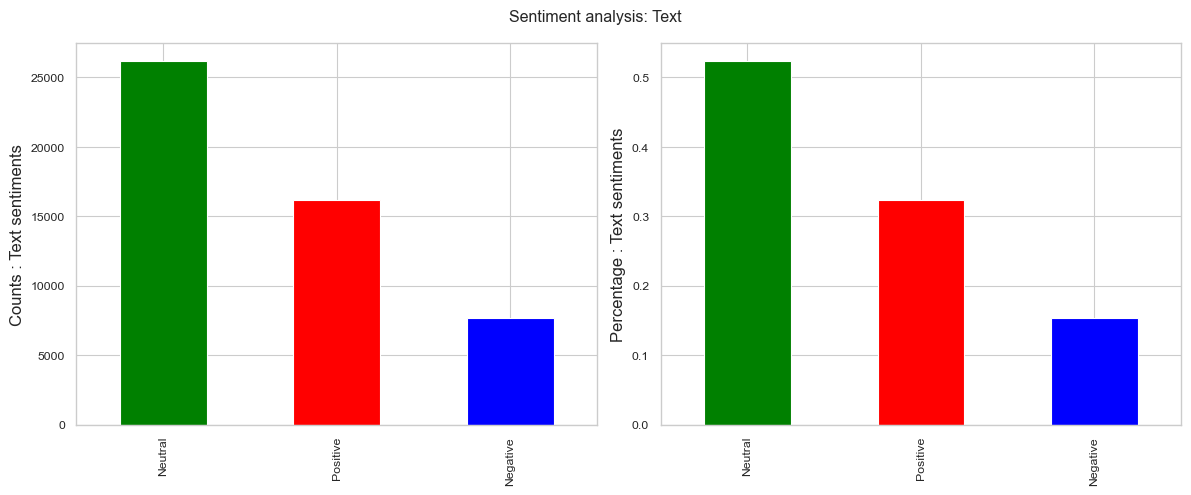

In [60]:
df['text_sentiment'] = df['Text'].apply(lambda x: find_sentiment(x))
plot_sentiment(df, 'text_sentiment', 'Text')

In [61]:
tweets_agg_df = df.groupby(["date_only", "text_sentiment"])["Text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "text_sentiment", "count"]

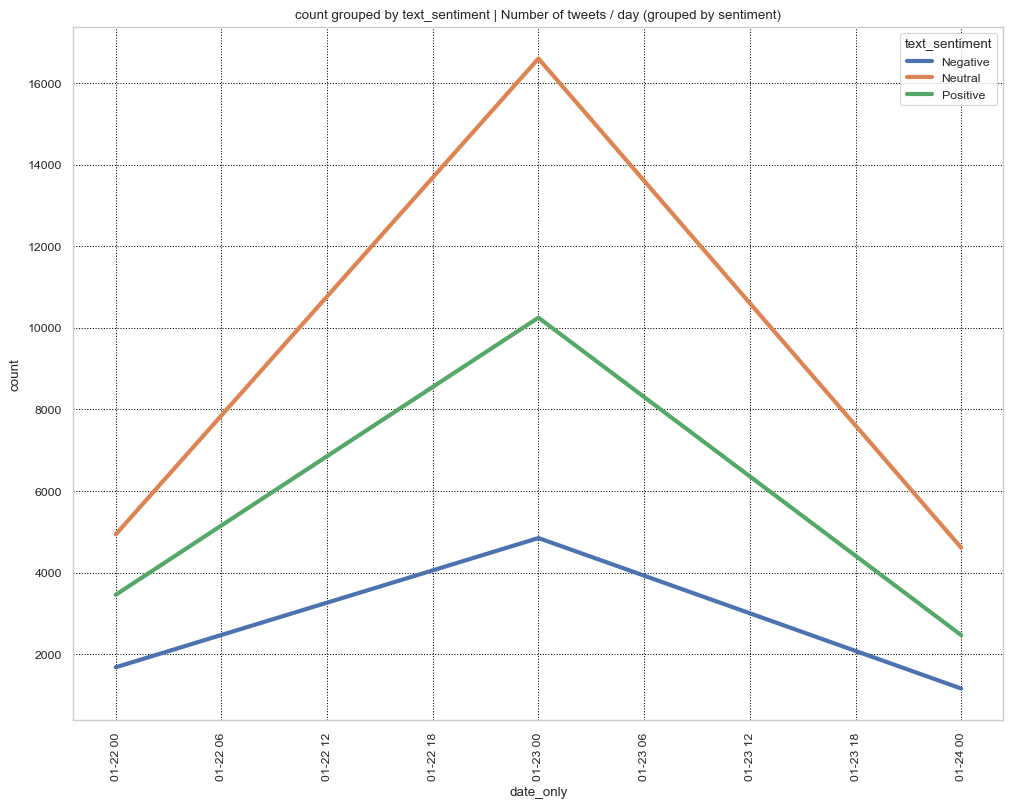

In [62]:
plot_time_variation(tweets_agg_df, x='date_only', hue="text_sentiment", title="Number of tweets / day (grouped by sentiment)",size=3)

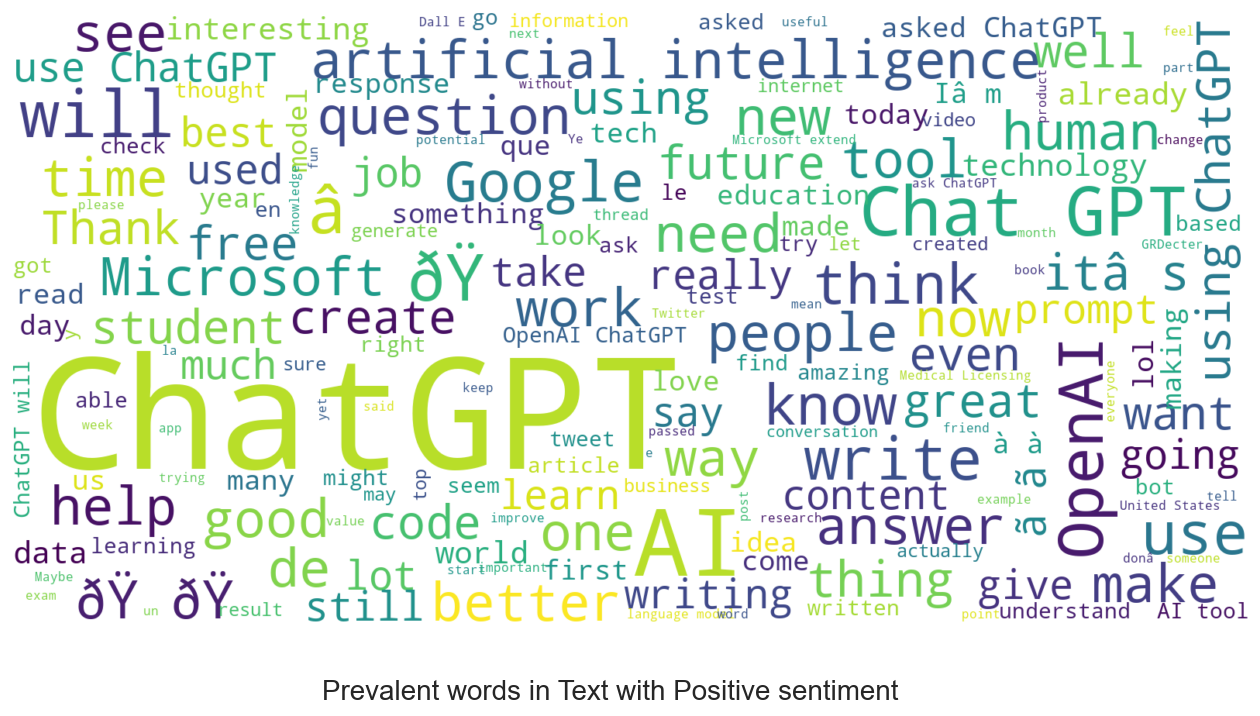

In [63]:
show_wordcloud(df.loc[df['text_sentiment']=="Positive", 'Text'], title = 'Prevalent words in Text with Positive sentiment', mask=None)

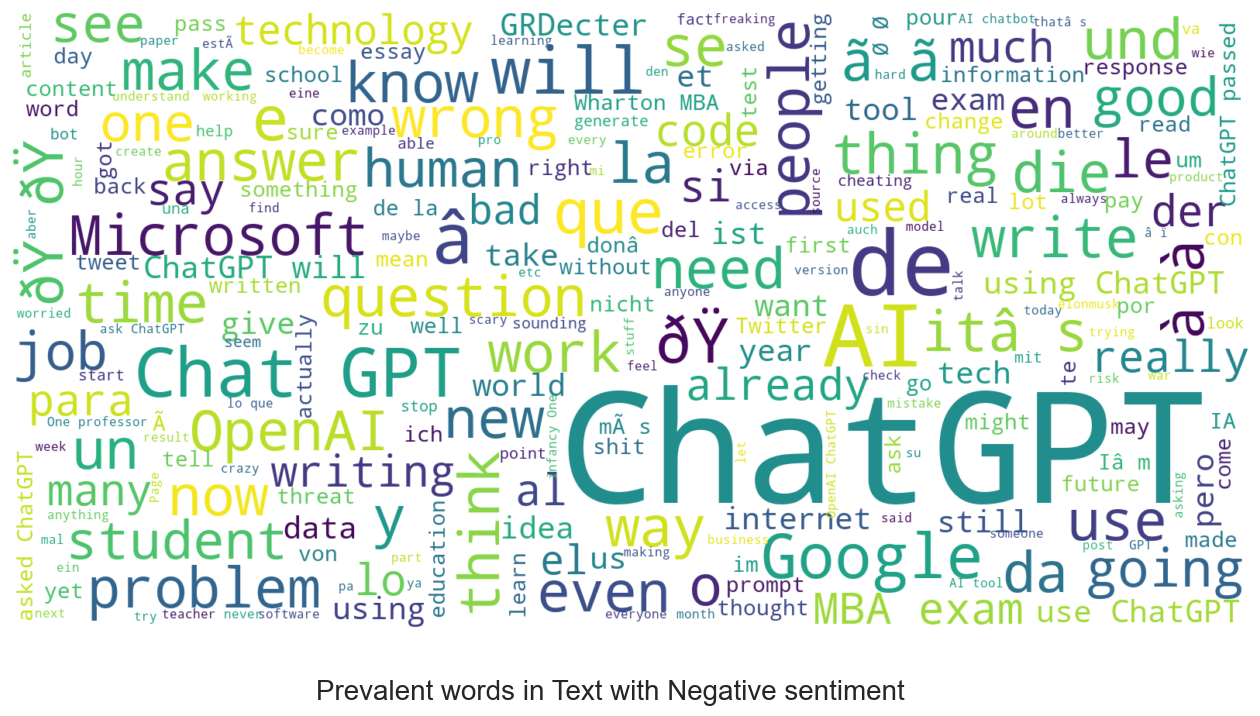

In [64]:
show_wordcloud(df.loc[df['text_sentiment']=="Negative", 'Text'], title = 'Prevalent words in Text with Negative sentiment', mask=None)

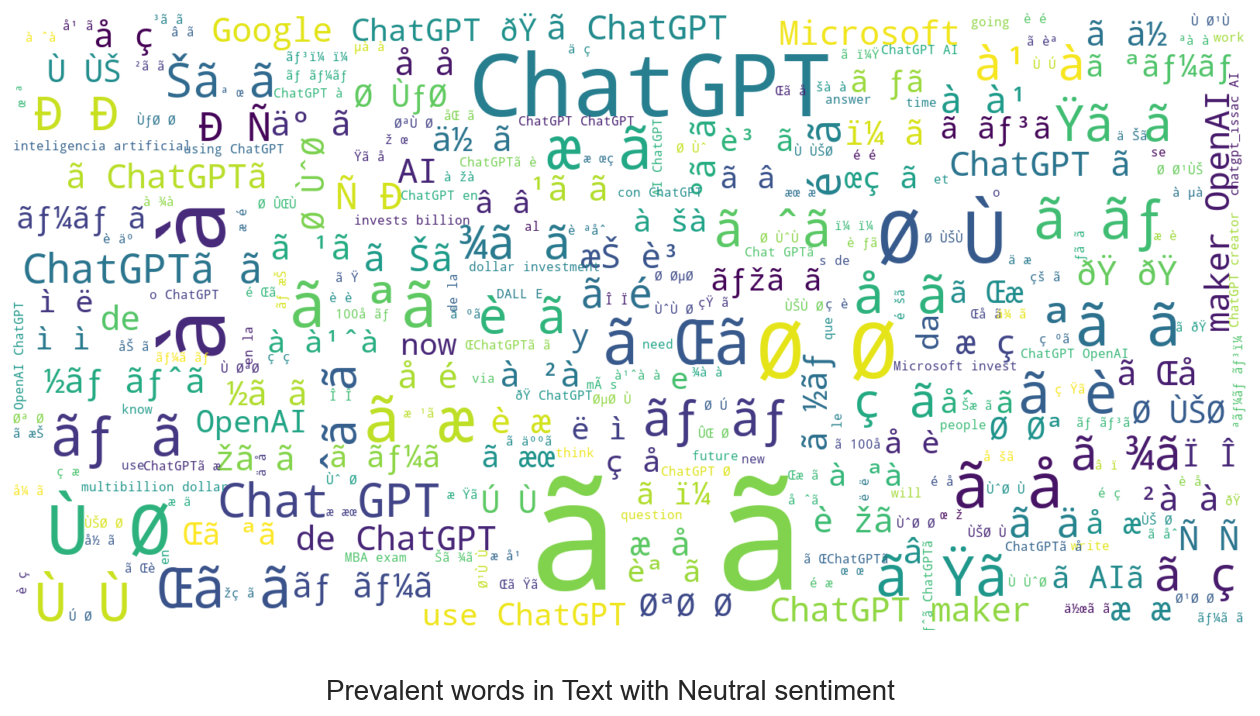

In [65]:
show_wordcloud(df.loc[df['text_sentiment']=="Neutral", 'Text'], title = 'Prevalent words in Text with Neutral sentiment', mask=None)


# TASK 2
<hr>

In [11]:

# importing the dataset
df = pd.read_excel("chatgpt1.xlsx")

df = df.dropna()  # Remove rows with missing values

# Split the dataset into features and target variable
X = df[['Text', 'Language']]
y = df['Username']

# Label encode the 'Text' and 'Language' columns
label_encoder = LabelEncoder()
X['Text'] = label_encoder.fit_transform(X['Text'])
X['Language'] = label_encoder.fit_transform(X['Language'])

# Encoding categorical variables (if any)
# Perform one-hot encoding or label encoding on categorical columns in X

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.1111111111111111


/var/folders/4y/h64hkxdj44s1s79_cfz2hdy40000gn/T/ipykernel_1479/2649883503.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Text'] = label_encoder.fit_transform(X['Text'])
/var/folders/4y/h64hkxdj44s1s79_cfz2hdy40000gn/T/ipykernel_1479/2649883503.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Language'] = label_encoder.fit_transform(X['Language'])


# Task 3
<hr>

In [12]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [13]:
# Load the dataset
df = pd.read_excel("chatgpt1.xlsx")

In [14]:
df.head(2)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871689984,ChatGPTã§éŠã¶ã®å¿˜ã‚Œã¦ãŸï¼ï¼\næ›¸é¡žä...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871689984,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046129920,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993799936,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0


In [ ]:
# Preprocessing
df = df.dropna(subset=['Text'])  # Remove rows with missing text content
text_data = df['Text'].values

# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(text_data)

# Additional features
num_mentions = df['Text'].str.count('@')
num_hashtags = df['Text'].str.count('#')
other_features = np.column_stack((num_mentions, num_hashtags))

# Combine text features with other features
combined_features = np.hstack((text_features.toarray(), other_features))

# Perform clustering using K-Means
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(combined_features)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the dataset
df['ClusterLabel'] = cluster_labels

# Print the cluster labels for each tweet
for index, row in df.iterrows():
    print(f"Tweet: {row['Text']}, Cluster: {row['ClusterLabel']}")

# Task 4
<hr>

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer

In [14]:
# Load the dataset
df = pd.read_excel("chatgpt1.xlsx")

In [15]:
# Preprocess the data
# Handle missing values
df = df.dropna()  # Remove rows with missing values or apply appropriate imputation method
df.head(2)

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
2,2023-01-22 13:44:44+00:00,1617156308926340096,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926340096,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
392,2023-01-22 14:08:23+00:00,1617162263273600000,@OpenAI ChatGPT does! https://t.co/MlMO00Vg8A ...,Why_So_Trill,https://twitter.com/Why_So_Trill/status/161716...,https://twitter.com/Why_So_Trill,['https://twitter.com/vcrussell/status/1617154...,['https://t.co/MlMO00Vg8A'],0,0,2,0,1617162263273600000,en,"<a href=""http://twitter.com/download/iphone"" r...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/VCRussell/status/161715463...,"[User(username='OpenAI', id=4398626122, displa...",[],0


In [16]:
# Select the relevant features and target variable
text_feature = 'Text'
numeric_features = ['ReplyCount', 'LikeCount', 'QuoteCount']
target = 'RetweetCount'

# Prepare the data
X_text = df[text_feature]
X_numeric = df[numeric_features]
y = df[target]

# Split the data into training and testing sets
X_text_train, X_text_test, X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(
    X_text, X_numeric, y, test_size=0.2, random_state=42
)

# Convert NaN values to empty string in the text data
X_text_train.fillna('', inplace=True)
X_text_test.fillna('', inplace=True)

# Convert the text data to string type
X_text_train = X_text_train.astype(str)
X_text_test = X_text_test.astype(str)

# Vectorize the text data using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_text_train_vectorized = vectorizer.fit_transform(X_text_train)
X_text_test_vectorized = vectorizer.transform(X_text_test)

# Convert column names to strings for the numeric features
X_numeric_train.columns = X_numeric_train.columns.astype(str)
X_numeric_test.columns = X_numeric_test.columns.astype(str)

# Impute missing values in the numeric features
imputer = SimpleImputer(strategy='mean')
X_numeric_train_imputed = imputer.fit_transform(X_numeric_train)
X_numeric_test_imputed = imputer.transform(X_numeric_test)

# Combine the vectorized text data with the numeric features
X_train = pd.concat([pd.DataFrame(X_text_train_vectorized.toarray()), pd.DataFrame(X_numeric_train_imputed)], axis=1)
X_test = pd.concat([pd.DataFrame(X_text_test_vectorized.toarray()), pd.DataFrame(X_numeric_test_imputed)], axis=1)

# Train the KNN model
k = 5  # Number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

# Ensure X_test doesn't contain missing values
X_test = X_test.fillna(0)  # Replace missing values with 0 or use another suitable imputation strategy

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.991111111111111


# Task 5
<hr>